# Python Project: How can we be more sure of our investment thesis and market movement prediction? <br>

## - SPX Data Mining (factor=UNEMPLOYMENT, CPI (CPIAUCSL), 10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity)

### *By Junseong Lee (Sophomore @ Gies College of Business, University of Illinois at Urbana Champaign; B.S. Finance + Data Science, Computer Science Minor)*

#### Objective:

- Fit a model to the data of S&P500 and economic indicators.

- Interpretate the model and find a possible association between them.

##### **This project attempts to find a data series or macro-economic indicators which could be predictive of asset price movements and therefore actionable by investors.**
***

## 0. Introduction to project

With the pressure of the Russo-Ukraine War and tension between the United States and China, the economy has been on a downward trend for the fiscal year of $2022$. The inflation index CPI has rose about 9.1% over the year 2022, which was the largest jump in $40$ years. The unemployment currently has been staying around $3.5$-$3.7$ percent, and the rate is expected to rise as of Dec. $2022$ as big tech companies began huge layoffs throughout the year; Tesla $29,999$ employees, Microsoft $21,731$ employees, Snap $21,332$ employees, Amazon $10,000$ employees, as well as Carvana, Oracle, Coinbase, Twitter, etc. <br>

For this personal project, I wanted to dive deeper into the relationship between economic numbers, such as **SPX (S&P 500 index)**, **UNRATE (unemployment rate)**, **CPI (the US consumer price index)**, and **TREASURY YIELD (refers to 10-year treasury constant maturity minus 3-month treasury constant maturity)**. Having said that, I will be using what I have learned from the STAT107 class and my previous knowledge in statistical analysis & stock market to examine these numeric values and seek to find potential correlations between the stock market movement and economic indicators. Majorly, I will be looking at the change in significant dates like 9/11, the 2008 subprime mortgage crisis, and the Covid-19 pandemic where the economy drastically fluctuated. 


< quick concepts > <br>
- S&P 500 
    - The Standard & Poor’s 500, often abbreviated as the S&P 500, is an American stock market index based on the market cpitalizations of 500 large companies having common stock listed on the NYSE or NASDAQ
    - Growth of the S&P 500 index can translate into growth of business investment. It can also be a clue to higher future consumer spending. A declining S&P 500 index can signal a tightening of belts for both businesses and consumers.
- CPI
    - A consumer price index (CPI) measures changes in the price level of a market basket of consumer goods and services purchased by households. Changes in CPI are used to assess price changes associated with the cost of living. CPI is one of the most frequently used statistics for identifying period of inflation or deflation. This is because large rises in CPI during a short period of time typically denote periods of inflation and large drops in CPI during a short period of time usually mark periods of deflation
- UNRATE
    - The percentage of unemployed workers in the total labor force
    - Unemployment can result in debt and poverty, and the government has to take care of these people, hence welfare spending would also increase at the same time. In cases where unemployment is very high, there would be a budget deficit, due to a combination of the two, loss of tax revenue and increased welfare spending.
- TREASURY YIELD
    - The 10-year Treasury yield is closely watched as an indicator of broader investor confidence. Because Treasury bills, notes, and bonds carry the full backing of the U.S. government, they are viewed as one of the safest investments.
    - When confidence is high, prices for the 10-year drop and yields rise. This is because investors feel they can find higher-returning investments elsewhere and do not feel they need to play it safe. But when confidence is low, bond prices rise and yields fall, as there is more demand for this safe investment. <br>
- PAYEMS
    - PAYEMS is the measure of the number of U.S. workers in the economy that excludes proprietors, private household employees, unpaid volunteers, farm employees, and the unincorporated self-employed.
    - A strong jobs report may lead the Federal Reserve to raise interest rates to prevent an overheated labor market or curb inflation, leading to a decline in stock prices.

*source: investopedia, wikipedia, focus-economics.com*

***
## 1.1 Raw Data Retrieval

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import datetime
import os
import statsmodels.api as sm

# ML library import
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# seaborn set up
# sns.set_style('whitegrid')
# sns.set_style

#period in datasets = 1970/02/01 - 2022/12/01
#df_payrollEmployment = pd.read_csv("/Users/jun/Desktop/PythonProject/PAYEMS.csv") #https://fred.stlouisfed.org/series/PAYEMS
df_spx = pd.read_csv("/Users/jun/Desktop/PythonProject/SPX.csv")  #investing.com SPX historical data/monthly
df_unemploymentRate = pd.read_csv("/Users/jun/Desktop/PythonProject/UNRATE.csv")  #https://fred.stlouisfed.org/series/UNRATE 
df_cpi = pd.read_csv('/Users/jun/Desktop/PythonProject/CPI.csv')  #https://fred.stlouisfed.org/series/CPALTT01USM659N
df_treasuryYield = pd.read_csv('/Users/jun/Desktop/PythonProject/TREASURYYIELD.csv')  #https://fred.stlouisfed.org/series/T10Y3M 

df_all = pd.read_csv("/Users/jun/Desktop/PythonProject/SPX.csv")  #investing.com SPX historical data/monthly
df_all['CPI'] = df_cpi['CPI']
df_all['TREASURY YIELD'] = df_treasuryYield['TREASURY YIELD']
df_all['UNRATE'] = df_unemploymentRate['UNRATE']

Read read the data CSV files into the notebook to make sure the data loads correctly.

In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            492 non-null    object 
 1   PRICE           492 non-null    float64
 2   CPI             492 non-null    float64
 3   TREASURY YIELD  492 non-null    float64
 4   UNRATE          492 non-null    float64
dtypes: float64(4), object(1)
memory usage: 19.3+ KB


In [5]:
df_all.DATE = pd.to_datetime(df_all.DATE)
df_spx.DATE = pd.to_datetime(df_spx.DATE)
df_cpi.DATE = pd.to_datetime(df_cpi.DATE)
df_unemploymentRate.DATE = pd.to_datetime(df_unemploymentRate.DATE)
df_treasuryYield.DATE = pd.to_datetime(df_treasuryYield.DATE)



In [6]:
df_unemploymentRate

,DATE,UNRATE
0,1982-01-01,8.6
1,1982-02-01,8.9
2,1982-03-01,9.0
3,1982-04-01,9.3
4,1982-05-01,9.4
...,...,...
487,2022-08-01,3.7
488,2022-09-01,3.5
489,2022-10-01,3.7
490,2022-11-01,3.7


In [7]:
df_spx

,DATE,PRICE
0,1982-01-01,120.40
1,1982-02-01,113.11
2,1982-03-01,111.96
3,1982-04-01,116.44
4,1982-05-01,111.88
...,...,...
487,2022-08-01,3955.00
488,2022-09-01,3585.62
489,2022-10-01,3871.98
490,2022-11-01,4080.11


In [8]:
df_cpi

,DATE,CPI
0,1982-01-01,94.40
1,1982-02-01,94.70
2,1982-03-01,94.70
3,1982-04-01,95.00
4,1982-05-01,95.90
...,...,...
487,2022-08-01,295.62
488,2022-09-01,296.76
489,2022-10-01,298.06
490,2022-11-01,298.01


In [9]:
df_treasuryYield
df_treasuryYield.dropna()

,DATE,TREASURY YIELD
0,1982-01-01,1.06
1,1982-02-01,1.03
2,1982-03-01,0.19
3,1982-04-01,0.72
4,1982-05-01,1.74
...,...,...
487,2022-08-01,0.19
488,2022-09-01,0.50
489,2022-10-01,-0.12
490,2022-11-01,-0.69


In [10]:
df_all

,DATE,PRICE,CPI,TREASURY YIELD,UNRATE
0,1982-01-01,120.40,94.40,1.06,8.6
1,1982-02-01,113.11,94.70,1.03,8.9
2,1982-03-01,111.96,94.70,0.19,9.0
3,1982-04-01,116.44,95.00,0.72,9.3
4,1982-05-01,111.88,95.90,1.74,9.4
...,...,...,...,...,...
487,2022-08-01,3955.00,295.62,0.19,3.7
488,2022-09-01,3585.62,296.76,0.50,3.5
489,2022-10-01,3871.98,298.06,-0.12,3.7
490,2022-11-01,4080.11,298.01,-0.69,3.7



## 1.2 Data Cleaning

> Null Check

<AxesSubplot:>

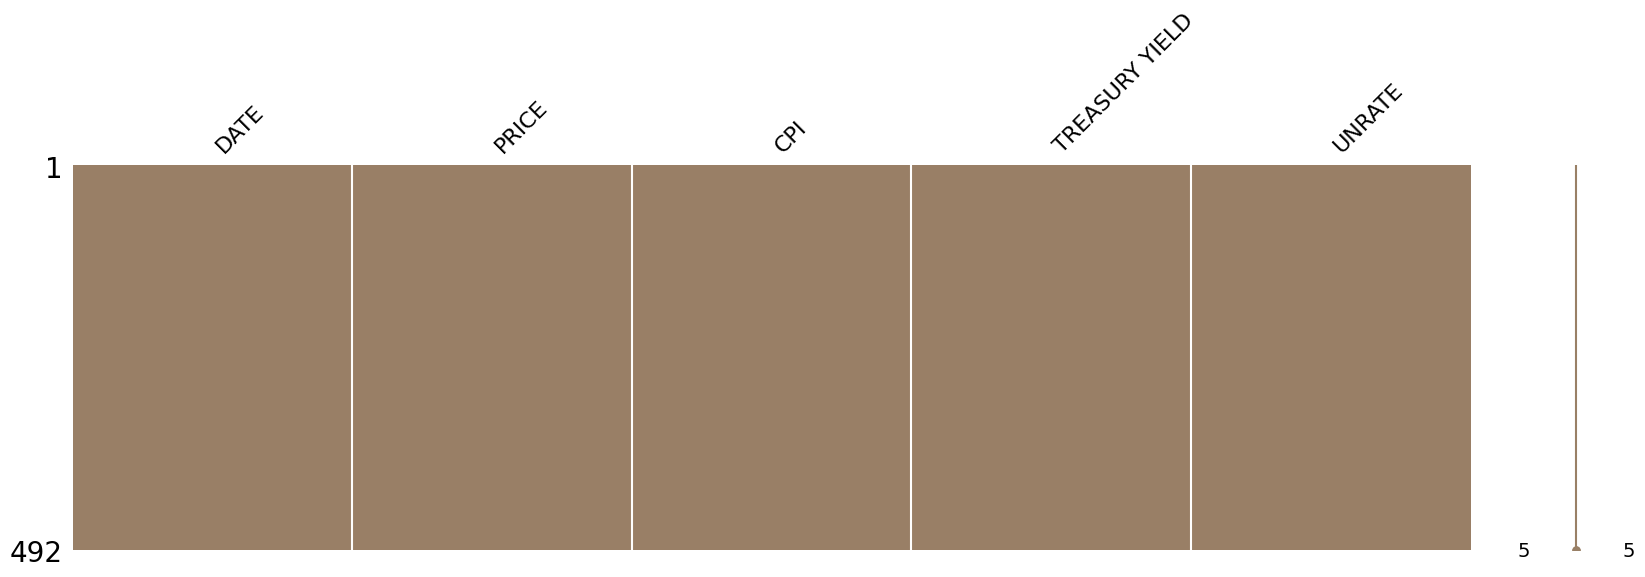

In [11]:
msno.matrix(df=df_all.iloc[:, :], figsize=(20,5), color=(0.6, 0.5, 0.4))

In [12]:
df_all.dropna(inplace = True)
df_all.tail()

for col in df_all.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_all[col].isnull().sum() / df_all[col].shape[0]))
    print(msg)

column:       DATE	 Percent of NaN value: 0.00%
column:      PRICE	 Percent of NaN value: 0.00%
column:        CPI	 Percent of NaN value: 0.00%
column: TREASURY YIELD	 Percent of NaN value: 0.00%
column:     UNRATE	 Percent of NaN value: 0.00%


> Add percent change columns to each indicator dataframe and SPX.

In [13]:
df_cpi['CPI % Change'] = df_cpi.CPI.pct_change()
df_cpi

,DATE,CPI,CPI % Change
0,1982-01-01,94.40,NaN
1,1982-02-01,94.70,0.003178
2,1982-03-01,94.70,0.000000
3,1982-04-01,95.00,0.003168
4,1982-05-01,95.90,0.009474
...,...,...,...
487,2022-08-01,295.62,0.001185
488,2022-09-01,296.76,0.003856
489,2022-10-01,298.06,0.004381
490,2022-11-01,298.01,-0.000168


In [14]:
df_spx['PRICE % Change'] = df_spx.PRICE.pct_change()
df_spx

,DATE,PRICE,PRICE % Change
0,1982-01-01,120.40,NaN
1,1982-02-01,113.11,-0.060548
2,1982-03-01,111.96,-0.010167
3,1982-04-01,116.44,0.040014
4,1982-05-01,111.88,-0.039162
...,...,...,...
487,2022-08-01,3955.00,-0.042440
488,2022-09-01,3585.62,-0.093396
489,2022-10-01,3871.98,0.079863
490,2022-11-01,4080.11,0.053753


In [15]:
df_treasuryYield['TREASURY YIELD % Change'] = df_treasuryYield["TREASURY YIELD"].astype(float).pct_change()
df_treasuryYield

,DATE,TREASURY YIELD,TREASURY YIELD % Change
0,1982-01-01,1.06,NaN
1,1982-02-01,1.03,-0.028302
2,1982-03-01,0.19,-0.815534
3,1982-04-01,0.72,2.789474
4,1982-05-01,1.74,1.416667
...,...,...,...
487,2022-08-01,0.19,-0.269231
488,2022-09-01,0.50,1.631579
489,2022-10-01,-0.12,-1.240000
490,2022-11-01,-0.69,4.750000


In [16]:
df_unemploymentRate["UNRATE % Change"] = df_unemploymentRate["UNRATE"].pct_change()
df_unemploymentRate

,DATE,UNRATE,UNRATE % Change
0,1982-01-01,8.6,NaN
1,1982-02-01,8.9,0.034884
2,1982-03-01,9.0,0.011236
3,1982-04-01,9.3,0.033333
4,1982-05-01,9.4,0.010753
...,...,...,...
487,2022-08-01,3.7,0.057143
488,2022-09-01,3.5,-0.054054
489,2022-10-01,3.7,0.057143
490,2022-11-01,3.7,0.000000


***
## 2. Exploratory Analysis (Data Visualization and Data Mining)

In [17]:
print(df_all.columns.values)

['DATE' 'PRICE' 'CPI' 'TREASURY YIELD' 'UNRATE']


In [18]:
data = pd.concat([df_spx['PRICE'],df_unemploymentRate['UNRATE'],df_cpi['CPI'],df_treasuryYield['TREASURY YIELD']],axis = 1)
data.columns = ['S&P','Unemployment Rate','CPI','10yr Treasury Yield']

In [19]:
# The (likely) coronavirus recession. ...
# The Great Recession (December 2007 to June 2009) ...
# Dot-com recession (March 2001 to November 2001) ...
# Gulf War recession (July 1990 to March 1991) ...
# Energy crisis recession (July 1981 to November 1982)
xposition = [pd.to_datetime('2001-09-11'), pd.to_datetime('2008-04-01'), pd.to_datetime('2020-03-01')]

> Dual Axis Plots

In [20]:
df_all

,DATE,PRICE,CPI,TREASURY YIELD,UNRATE
0,1982-01-01,120.40,94.40,1.06,8.6
1,1982-02-01,113.11,94.70,1.03,8.9
2,1982-03-01,111.96,94.70,0.19,9.0
3,1982-04-01,116.44,95.00,0.72,9.3
4,1982-05-01,111.88,95.90,1.74,9.4
...,...,...,...,...,...
487,2022-08-01,3955.00,295.62,0.19,3.7
488,2022-09-01,3585.62,296.76,0.50,3.5
489,2022-10-01,3871.98,298.06,-0.12,3.7
490,2022-11-01,4080.11,298.01,-0.69,3.7


In [21]:
# def createDualAxisPlot(df,df2):
#     ax_left = df.plot(x='DATE',y=df, color='r')
#     ax_left.set_ylabel('Unemployment Rate', color = 'r')
#     ax_right = ax_left.twinx()
#     ax_right.plot(df2.DATE,df_all['TREASURY YIELD'],color='y')
#     ax_right.set_ylabel('Treasury Yield', color='y')
#     ax_left.set_xlabel('DATE')
#     plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
#     plt.title('Unemployment Rate and Treasury Yield')

#     # adding vertical lines
#     for xc in xposition:
#         ax_left.axvline(x=xc, color='k', linestyle='dashed')
#     plt.show()


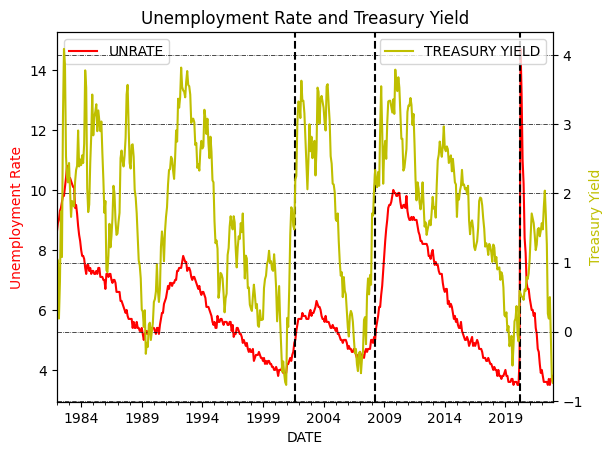

In [22]:
fig, ax = plt.subplots(1,1)

df_all.plot(x='DATE',y=['UNRATE'], color='r', ax=ax)
ax.set_ylabel('Unemployment Rate', color = 'r')

ax2 = ax.twinx()
df_all.plot(x='DATE',y='TREASURY YIELD', color='y', ax=ax2)
ax2.set_ylabel('Treasury Yield', color='y')
ax2.set_xlabel('DATE')

# adding grid and title
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.title('Unemployment Rate and Treasury Yield')
# adding vertical lines
for xc in xposition:
    ax.axvline(x=xc, color='k', linestyle='dashed')
plt.show()



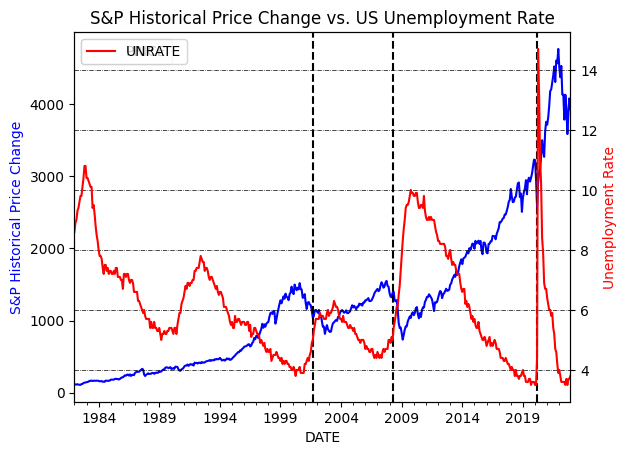

In [23]:
fig, ax = plt.subplots(1,1)

df_all.plot(x='DATE',y=['PRICE'], color='b', ax=ax)
ax.set_ylabel('S&P Historical Price Change', color = 'b')

ax2 = ax.twinx()
df_all.plot(x='DATE',y='UNRATE', color='r', ax=ax2)
ax2.set_ylabel('Unemployment Rate', color='r')
ax2.set_xlabel('DATE')

# adding grid and title
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.title('S&P Historical Price Change vs. US Unemployment Rate')
# adding vertical lines
for xc in xposition:
    ax.axvline(x=xc, color='k', linestyle='dashed')
plt.show()

Observation:
- the chart for the US unemployment rate (red) and S&P 500 index (blue), an inverse relationship can be found as the SPX uptrend reverses and begins to head down when the unemployment rate shoots up.

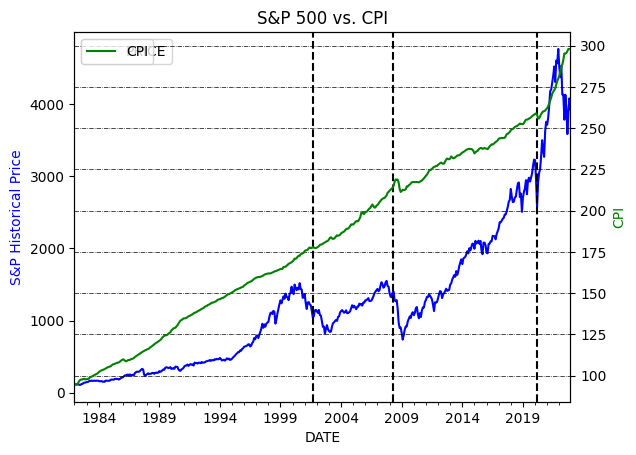

In [24]:
fig, ax = plt.subplots(1,1)

ax = df_all.plot(x='DATE',y=['PRICE'], color='b', ax=ax)

ax2 = ax.twinx()
df_all.plot(ax=ax2,x='DATE',y='CPI', color='green')



ax.set_ylabel('S&P Historical Price', color = 'b')
ax2.set_ylabel('CPI', color='green')
ax.set_xlabel('DATE')
# adding grid and title
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.title('S&P 500 vs. CPI')
# adding vertical lines
for xc in xposition:
    ax.axvline(x=xc, color='k', linestyle='dashed')
plt.legend()
plt.show()



Observation:
- In contrast to the S&P/unemployment chart, a direct relationship is proved to be found between SPX and CPI data, which is a positive linear relationship.

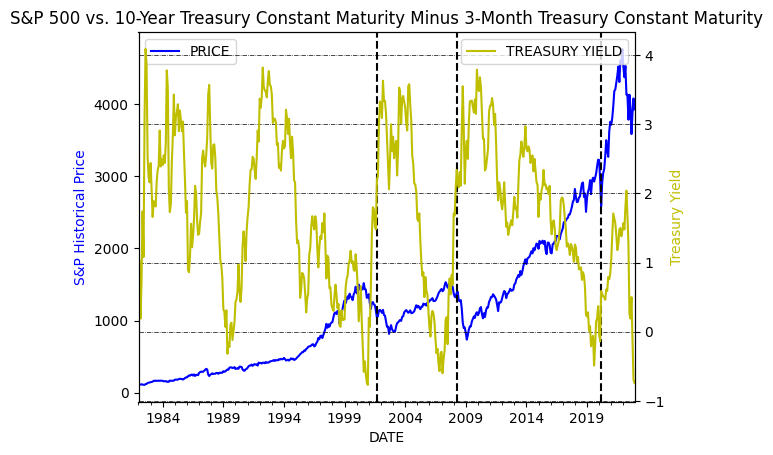

In [25]:
fig, ax = plt.subplots(1,1)

df_all.plot(x='DATE',y=['PRICE'], color='b', ax=ax)
ax.set_ylabel('S&P Historical Price', color = 'b')

ax2 = ax.twinx()
df_all.plot(x='DATE',y='TREASURY YIELD', color='y', ax=ax2)
ax2.set_ylabel('Treasury Yield', color='y')
ax2.set_xlabel('DATE')

# adding grid and title
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.title('S&P 500 vs. 10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity')
# adding vertical lines
for xc in xposition:
    ax.axvline(x=xc, color='k', linestyle='dashed')
plt.show()

Observation: 
- As shown in graph, on the dates of 2001, 2008, and 2020, the treasury yield fluctuated significantly, and a linear relationship seems to exist between SPX and the 10-yr treasury bond yield.

3. Statistical Analysis

>Heatmap
- I have created a Pearson Correlation heatmap to identify the potential relationship between each indicator. The map is shown below:

- correlation matrix (heatmap) indicates there is somewhat a correlation between 10yr treasury yield and unemployment rate --> Graph a dual axis plot for data series.
- data line color:
    - spx = blue
    - cpi = purple
    - treasury yield = yellow
    - unemployment rate = red
    - total # employed = teal

In [26]:
def createHeatmap(dataframe):
    colormap = plt.cm.RdBu
    sns.heatmap(dataframe.astype(float).corr(), linewidths= 0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 10})
    plt.show()

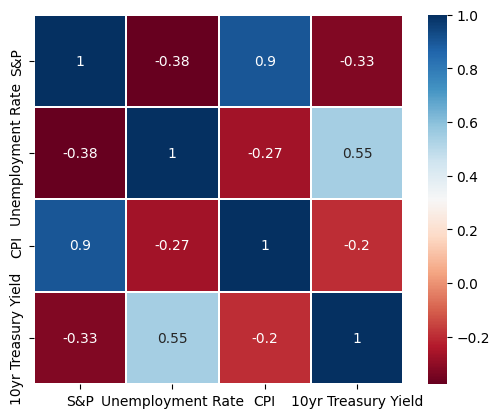

In [27]:
createHeatmap(data)

>Logarithmic Analysis

In [28]:
def logDataFrame(dataframe):
    df = dataframe
    df = df[['PRICE','CPI','UNRATE','TREASURY YIELD']] = np.log(df[['PRICE','CPI','UNRATE','TREASURY YIELD']])
    return df

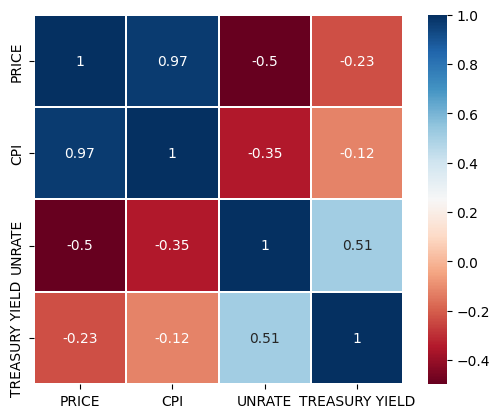

In [29]:
df_log = logDataFrame(df_all)
createHeatmap(df_log)

Observation:
There is a strong positive linear relationship between CPI index and S&P monthly price change.

Scatter Matrix (Pearson Correlation)

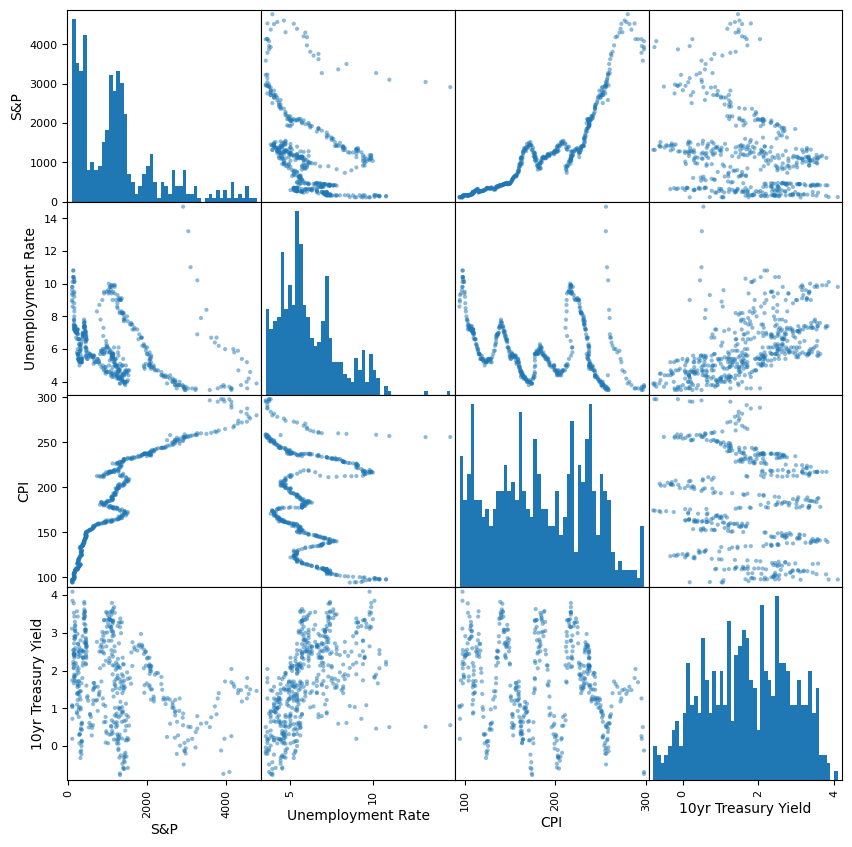

In [30]:
from pandas.plotting import scatter_matrix
data = pd.concat([df_spx['PRICE'],df_unemploymentRate['UNRATE'],df_cpi['CPI'],df_treasuryYield['TREASURY YIELD']],axis = 1)
data.columns = ['S&P','Unemployment Rate','CPI','10yr Treasury Yield']
scatter_matrix(data, figsize = (10,10), hist_kwds= {'bins':50})
plt.show()

- In multivariate statistics and probability theory, the scatter matrix is a statistic that is used to make estimates of the covariance matrix, for instance of the multivariate normal distribution.
- The above scatter matrix is the combination of histograms for each Dataframe and a subsequent scattered plot taking two Dataframes at a time. From the graph, we can clearly figure out that Unemployment Rate is loosely showing a linear correlation with 10yr Treasury Yield.

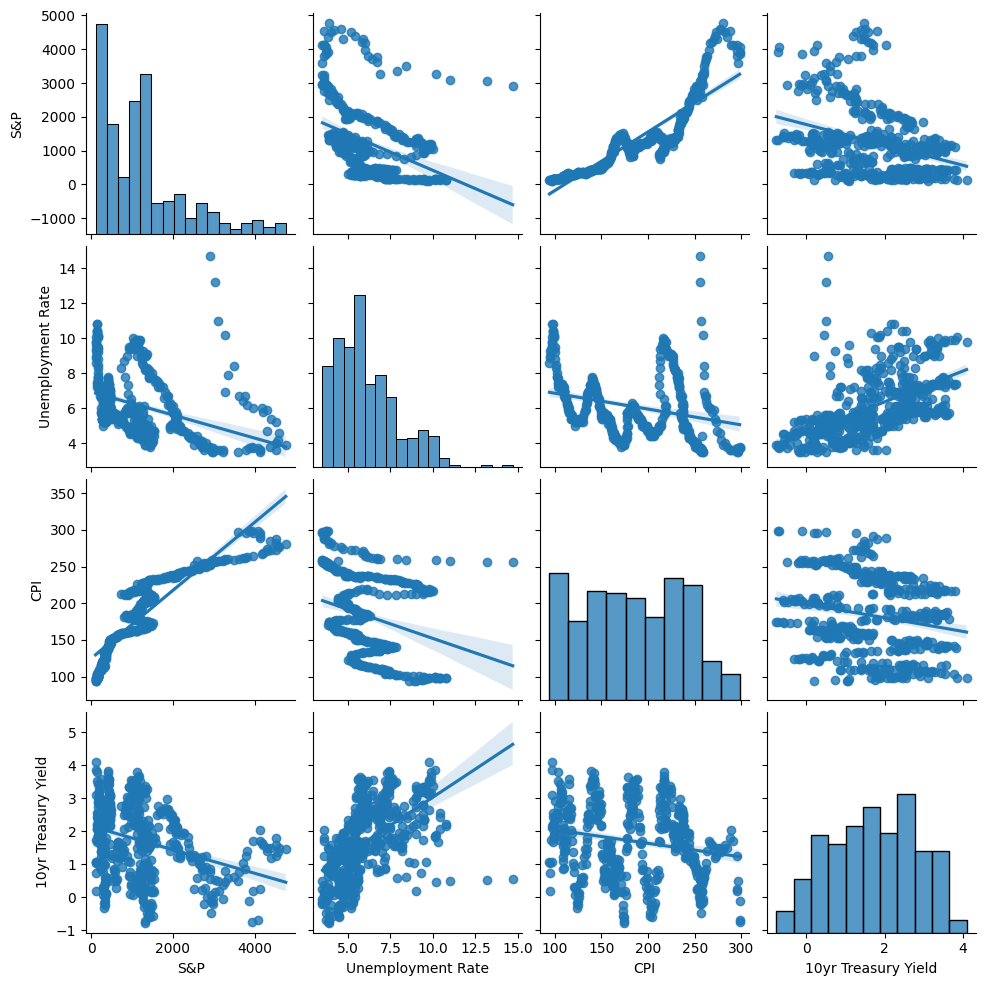

In [31]:
sns.pairplot(data, kind='reg')

- This is similar to the scatter matrix shown above, but the jointplot draws a slopeline on scatterplots.

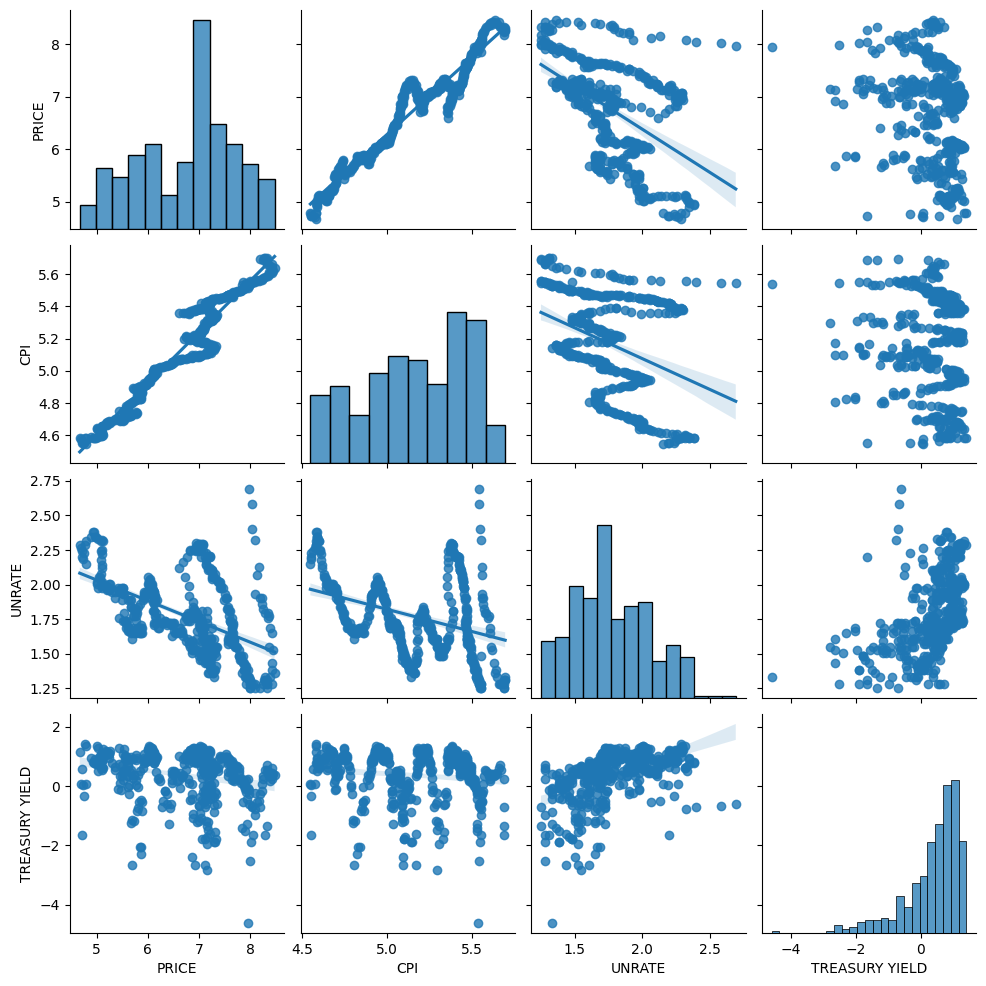

In [32]:
sns.pairplot(df_log, kind='reg')

#### KEY FINDINGS

- The performance of the S&P 500 index show to have a clear inverse relationship with unemployment rate.
- The performance of the S&P 500 index also indicate a linear relationship with CPI index as well as 10 year treasury bond yield.
- The PAYEMS (Total # employees) prove to have a positive linear relationship with SPX index, meaning the general Stock Market. 
- As shown on heatmap visualization, the 10 year treasury bond yield somewhat have a correlation with unemployment rate.

Overall, I have assessed the economic indicators that could potentially have a relationship with S&P 500 market movement, and the results approve that the CPI index, PAYEMS, abd 10-year treasury bond yield have a linear relationship with the movement of S&P 500 index, and the unemployment rate has an inverse relationship with S&P 500. 

*** 
## 4. Machine Learning - Linear Regression
- if I'm going to do modeling, what model am I trying to build? 
    - linear regression?
- What am i trying to get out of this?

Predicting stock prices is an enigmatic task pursued by many. Spot-on accuracy may not be practical but sometimes even simple linear models can be surprisingly close.

보통 train, test 만 언급되지만, 실제 좋은 모델을 만들기 위해서 우리는 valid set을 따로 만들어 모델 평가를 해봅니다.

마치 축구대표팀이 팀훈련(train)을 하고 바로 월드컵(test)로 나가는 것이 아니라, 팀훈련(train)을 한 다음 평가전(valid)를 거쳐 팀의 훈련 정도(학습정도)를 확인하고 월드컵(test)에 나가는 것과 비슷합니다.

train_test_split 을 사용하여 쉽게 train 셋을 분리할 수 있습니다.

In [42]:
# Split data into testing and training sets: 8:2 split
X_tr, X_vld, y_tr, y_vld = train_test_split(df_all[['CPI']], df_all[['PRICE']], test_size=0.15)

# # Test set
# print(X_vld.describe())

# # Training set
# print(X_tr.describe())

# # y Test set
# print(y_vld.describe())

# # y Training set
# print(y_tr.describe())


model = LinearRegression()

model.fit(X_tr, y_tr)
model_prediction = model.predict(X_vld)

# Printout relevant metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_vld, model_prediction))
print("Coefficient of Determination:", r2_score(y_vld, model_prediction))

print('Conclusively, Out of {} Price Moves, {:.2f}% Accuracy to predict the price accurately'.format(y_vld.shape[0], r2_score(y_vld, model_prediction)*100 ))

Model Coefficients: [[17.57590418]]
Mean Absolute Error: 287.29008736871964
Coefficient of Determination: 0.8649787666735129
Conclusively, Out of 74 Price Moves, 86.50% Accuracy to predict the price accurately


The prediction model proves to have 81% accuracy in average. It is evidently proven that there is a clear linear relationship between CPI and S&P index movement. In addition, I will also conduct derivative analysis to examine if I can identify areas of improevent on current model. 

Derivative Analysis - percent change of treasury yield and S&P 500


According to Mathmatical theory and concepts: 
First derivative = the slope of the graph at a point 
Second derivative tells whether the curve is concave up or concave down at that point

***
## 5. Hypothesis testing - Will the market go down in 2023?
- Apply LinearRegression model that we just trained and analyze the results.
- Record the result

In [43]:
prediction = model.predict([X_vld])
predict = prediction
predict

ValueError: Found array with dim 3. LinearRegression expected <= 2.